In [97]:
import cv2
import numpy as np
import imageio
import scipy
import scipy.misc
import pandas as pd
import os
import time
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
from sklearn import preprocessing

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

face_cascade= cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
imgs = os.listdir("./imgsDhoni")
num_px=128
count = 0;
a = np.array([])
mapImgs = {}

for k in imgs:
    img = imageio.imread("./imgsDhoni/" + k)    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        
    faces = face_cascade.detectMultiScale(gray , 1.1 ,5,minSize=(30, 30))
#     gray = preprocessing.scale(gray)
    for(x,y,w,h) in faces:
        image = np.array(gray[y:y+h, x:x+w])        
        my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px,1)).T
        if count == 0:
            a = my_image            
        else:
            a = np.append(a,my_image,axis = 0) 
        count = count + 1
        mapImgs[str(count)] = k


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from sklearn.cluster import MiniBatchKMeans
wcss = []
for i in range(1, 11):
    mkmeans = MiniBatchKMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y_kmeans = mkmeans.fit_predict(X)
    wcss.append(mkmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans
mkmeans = MiniBatchKMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = mkmeans.fit_predict(a)
print(y_kmeans)

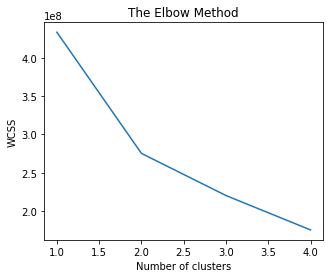

In [99]:
from sklearn.cluster import KMeans
wcss = []
min = 1
max = 5
for i in range(min, max):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y_kmeans = kmeans.fit_predict(a)
    wcss.append(kmeans.inertia_)
plt.plot(range(min, max), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [100]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(a)
print(a.shape)
print( np.reshape(y_kmeans[0:12], (-1, 4)))
# print(y_kmeans[16], y_kmeans[17])

(12, 16384)
[[0 0 0 1]
 [1 1 1 1]
 [1 0 0 0]]


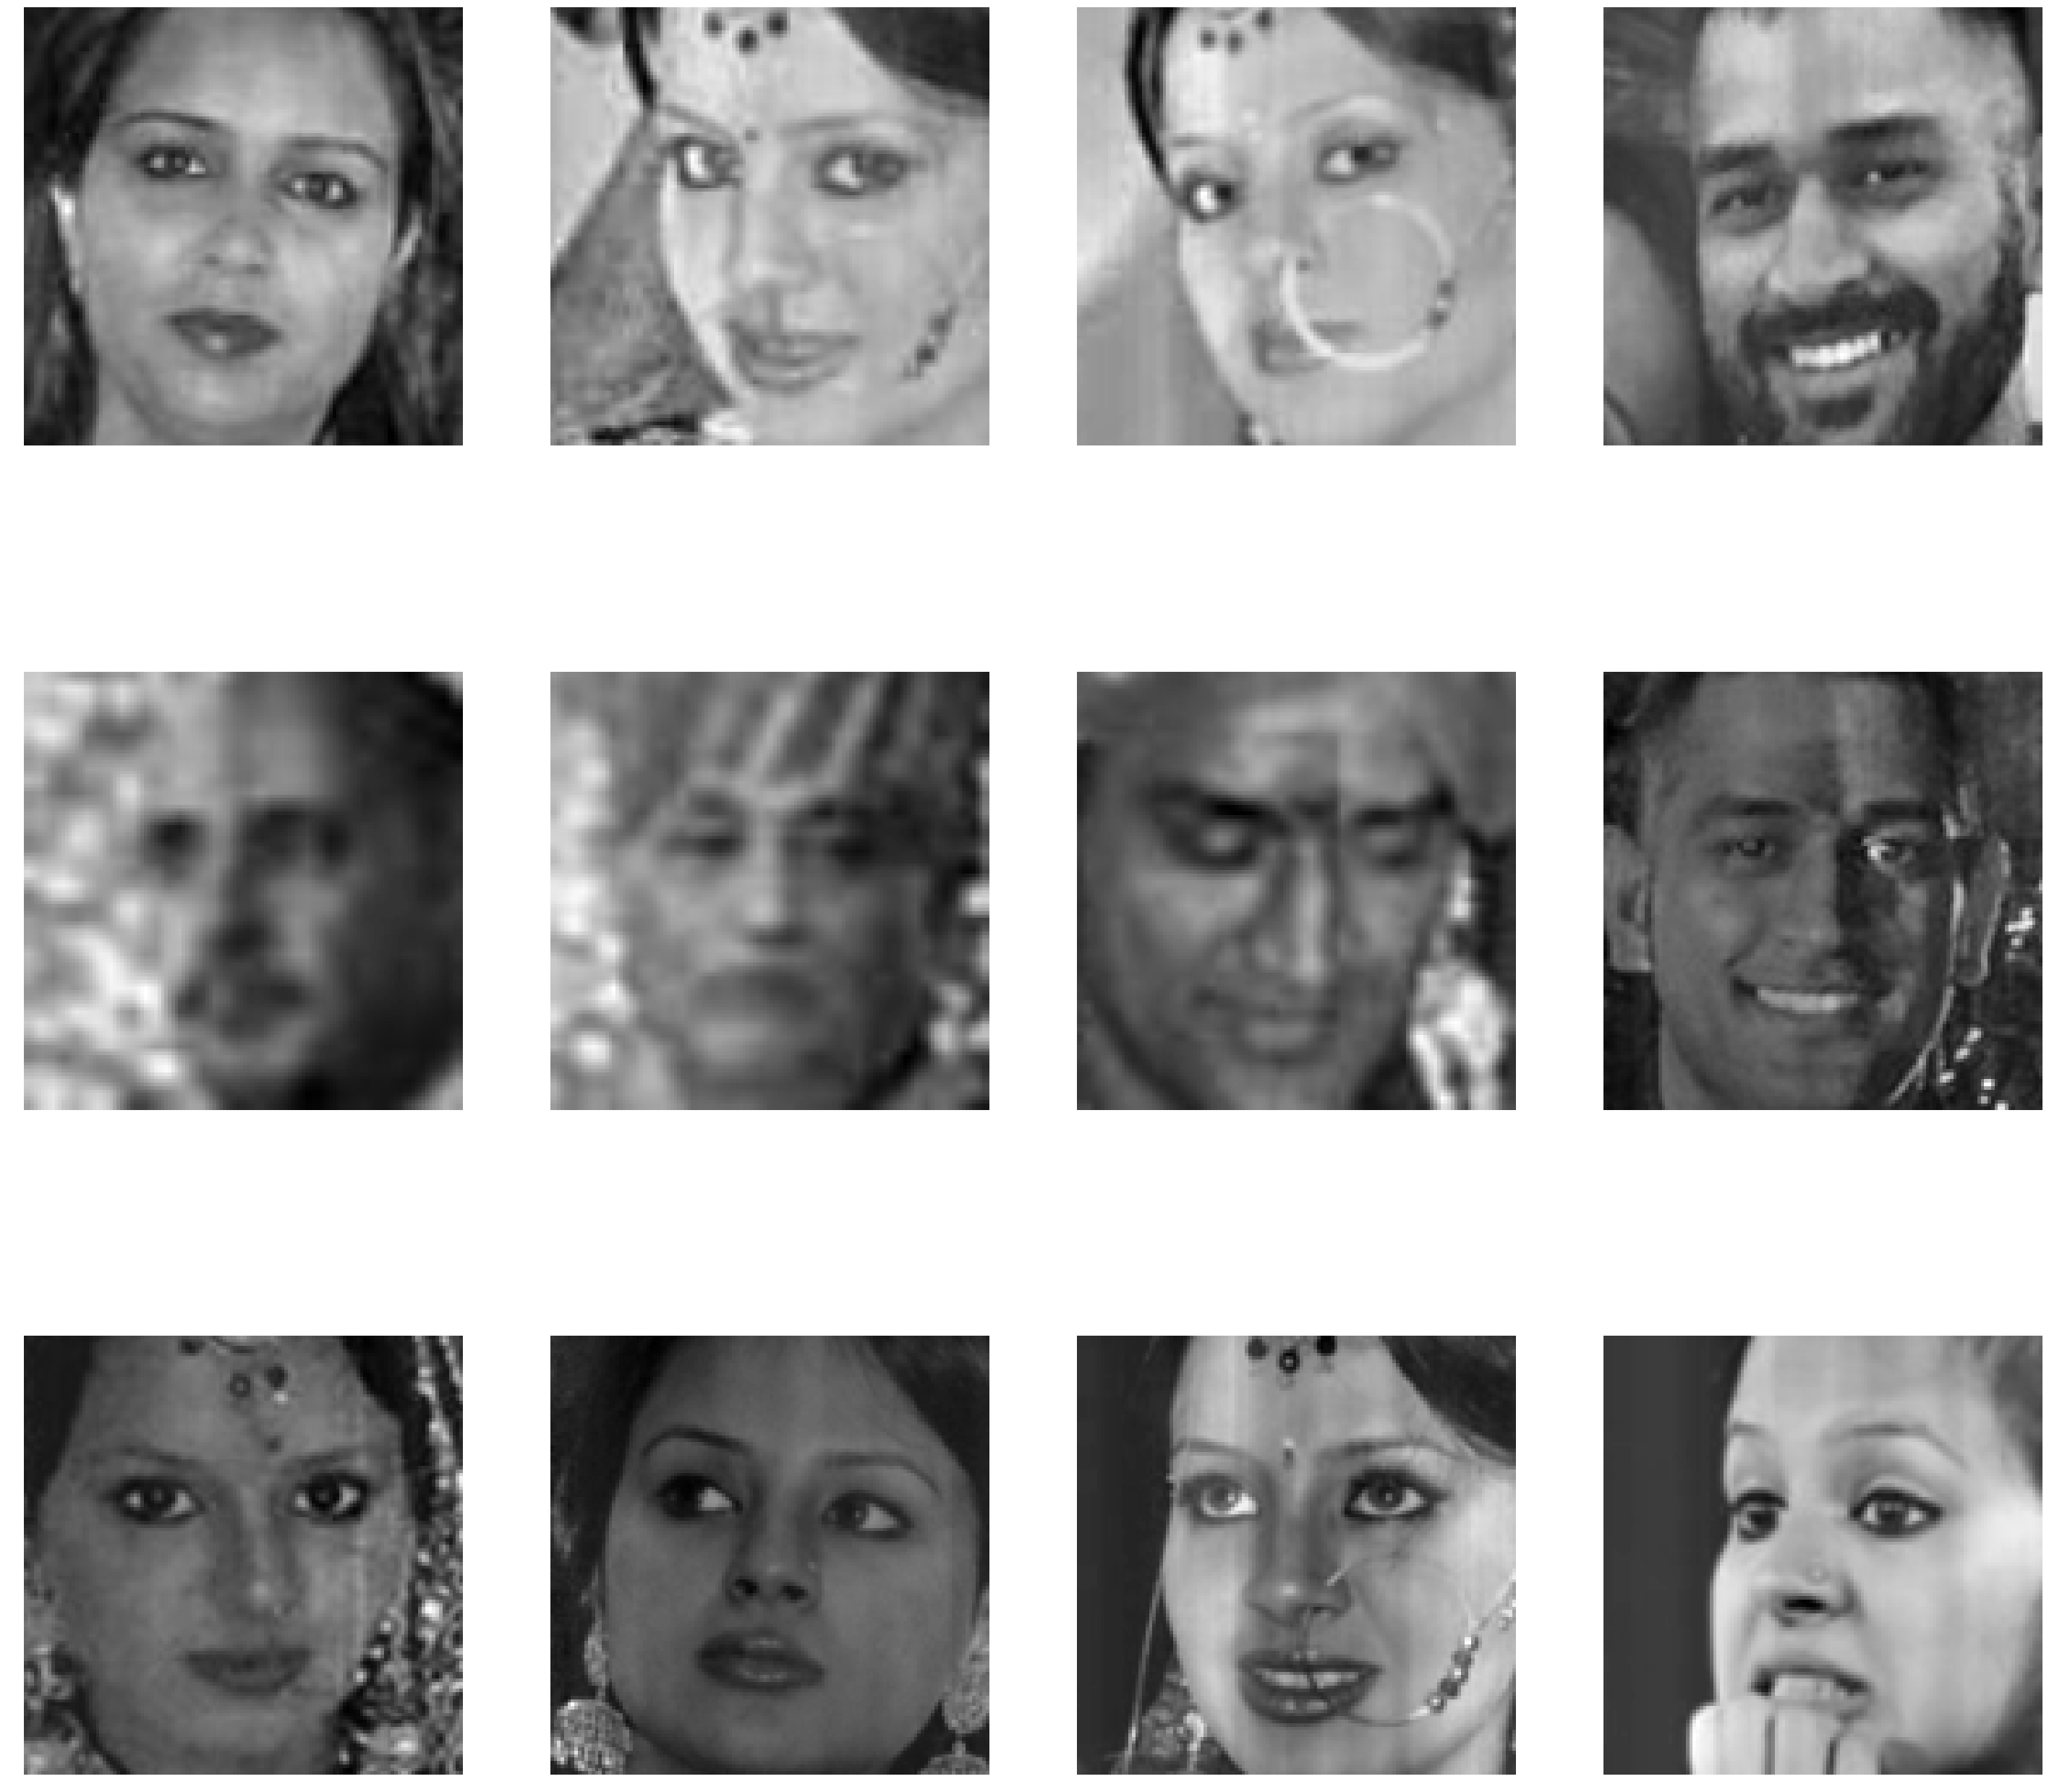

In [96]:
plt.rcParams['figure.figsize'] = (50.0, 200.0) # set default size of plots
num_images = a.shape[0]
for i in range(num_images):
    plt.subplot(num_images, 4, i + 1)
    plt.imshow(a[i].reshape(num_px,num_px), interpolation='nearest')
    plt.axis('off')
    
# plt.imshow(a[3].reshape(num_px,num_px,3))